In [1]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
from scipy.signal import hamming

import librosa
import os
import math
import numpy as np
import csv
from scipy.signal import find_peaks


def spectograma(y, nr_onset, sr=22050):
    path = os.getcwd()
    folder_out = 'spectograme_onseturi'                                   # folderul de output
    path_folder_out = os.path.join(path, folder_out)                    # se afla in proiect
    fisier_out = 'onset' +str(nr_onset) + '.jpg'                       # splitext ia numele fisierului fara extensie
    path_fisier_out = os.path.join(path_folder_out, fisier_out)         # calea fisierului de out

    plt.interactive(False)
    fig = plt.figure(figsize=[0.72, 0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)

    S = librosa.feature.melspectrogram(y=y, sr=sr)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))

    fig.savefig(path_fisier_out, dpi=400, bbox_inches='tight', pad_inches=0)

    plt.close(fig)

In [17]:
fisier = r'C:\Users\bogdan1.bratu\PycharmProjects\Project1\Notes-recognition\procesare\note_trainsitest\A3.wav'
y, sr = librosa.load(fisier)
S = librosa.feature.melspectrogram(y, sr)

C:\Users\bogdan1.bratu\AppData\Local\Temp\ipykernel_18480\2040151362.py:3: FutureWarning: Pass y=[4.0382180e-05 2.7779322e-05 5.8909514e-05 ... 3.3962782e-04 3.9713908e-04
 4.4622045e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr)


In [18]:
from sklearn import preprocessing

normalized = preprocessing.normalize(S)
normalized.shape

(128, 179)

In [23]:
normalized = preprocessing.normalize(normalized)
normalized

array([[4.5300661e-05, 2.5365784e-04, 1.8053838e-04, ..., 2.3542161e-04,
        1.8579312e-04, 9.0506241e-05],
       [1.2765825e-05, 3.3960408e-05, 4.9842431e-05, ..., 7.0539005e-05,
        4.1625688e-05, 5.1819861e-05],
       [9.7808974e-05, 2.2214001e-04, 1.6318556e-04, ..., 8.8704779e-05,
        8.9137160e-05, 4.5077968e-04],
       ...,
       [1.1397799e-02, 1.6628334e-02, 1.3216664e-02, ..., 2.4599541e-02,
        1.6420115e-02, 1.0622930e-02],
       [4.2413522e-09, 1.3227998e-08, 1.5201614e-08, ..., 1.3926900e-08,
        1.8279989e-08, 1.9020780e-08],
       [1.2476771e-09, 2.6760187e-09, 2.5617395e-09, ..., 2.0085313e-09,
        2.5280944e-09, 6.1794383e-09]], dtype=float32)

22050
66150
[  6  20  35  49  63  78  92 107 121]
[0.13931973 0.46439909 0.81269841 1.13777778 1.46285714 1.81115646
 2.13623583 2.48453515 2.80961451]


C:\Users\bogdan1.bratu\AppData\Local\Temp\ipykernel_15688\2426202367.py:18: RuntimeWarning: invalid value encountered in log10
  y_db = 10.0 * np.log10(y)


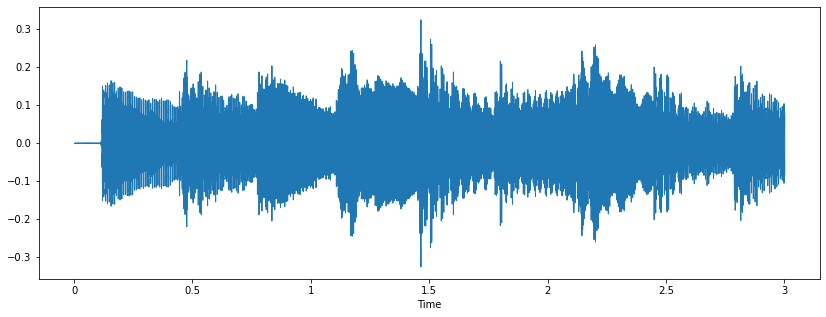

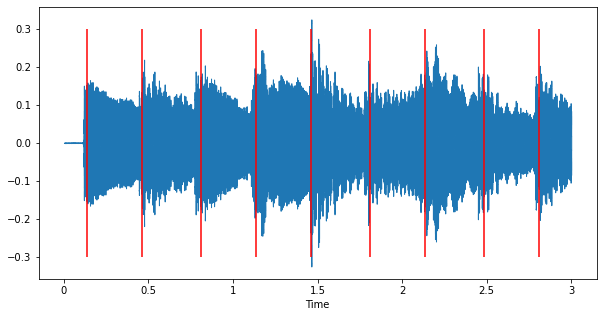

In [10]:
y, sr = librosa.load("piano.wav")
print(sr)  #rata de esnationare
print(len(y))  #y = duratata semnal in secunde * rata de esantionare sr
#durata = len(y)/sr

plt.figure(figsize=(14,5))
librosa.display.waveshow(y, sr=sr)

o_env = librosa.onset.onset_strength(y=y, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

print(onset_frames) # frame numbers of estimated onsets

onset_times = librosa.frames_to_time(onset_frames)
print(onset_times)

y_db = 10.0 * np.log10(y)

plt.figure(figsize=(10,5))
librosa.display.waveshow(y, sr=sr)
plt.vlines(onset_times, -0.3, 0.3, color = 'r')

In [11]:
#Esantionare semnal
fereastra = int(30*1e-3*sr)
print(fereastra)

#Ferestre suprapuse
p=0.2  #Factorul de suprapunere

#Numarul de cadre suprarpuse
numar_cadre_p = int(len(y)/(fereastra*(1-p)))
print("Numarul de cadre este %d" %numar_cadre_p)

#Creare variabila timp pentru axa Ox
time_axis = np.arange(0, fereastra)*1/sr #utilizata la plot-uri

661
Numarul de cadre este 125


In [12]:
# durata_nota_1 = (onset_times[1]-onset_times[0])
# print(durata_nota_1)
# durata_nota_2 = (onset_times[2]-onset_times[1])
# print(durata_nota_2)
# durata_nota_3 = (onset_times[3]-onset_times[2])
# print(durata_nota_3)
# durata_nota_4 = (onset_times[4]-onset_times[3])
# print(durata_nota_4)
# durata_nota_5 = (onset_times[5]-onset_times[4])
# print(durata_nota_5)
# durata_nota_6 = (onset_times[6]-onset_times[5])
# print(durata_nota_6)

In [18]:
# cadre onset

durata = len(y) / sr
timpi = np.arange(0, durata, 1/sr)
dictionar = {}
nr_esantion = [i for i in range(1, len(y) + 1)]
for i in range(len(nr_esantion)):
    dictionar[nr_esantion[i]] = timpi[i]

cadre = []
for i in range(len(onset_times)):
    onset1 = onset_times[i]
    try:
        onset2 = onset_times[i+1]
    except IndexError:
        onset2 = 3
    cadru_curent = []
    for j in range(len(y)):
        if j in dictionar:
            if dictionar[j] > onset1: 
                if dictionar[j] < onset2:
                    cadru_curent.append(j)
                else:
                    break
    cadre.append(cadru_curent)
    
# fiecare onset are o lista de esantioane
esantioane_onset = []
for i in range(len(cadre)):
    esantioane_onset.append(y[cadre[i][0] : cadre[i][-1]])

# note aferente fiecarui onset  
note = []
frecvente = []
for i in range(len(esantioane_onset)):
    spectograma(esantioane_onset[i], i)

In [106]:
# ferestre 0

def procesare_semnal():
    for k in range(numar_cadre_p):

        cadru_curent_p = y[int(fereastra*k*(1-p)):int(fereastra*(k*(1-p)+1))] 

        #Plot ferestre
        #plt.figure(figsize=(14,5))
        #plt.plot(time_axis, cadru_curent_p)
        #plt.title("Cadru de analiza: %d" %(k+1))
        #plt.xlabel("Time [sec]")
        #plt.xlim((0, time_axis[-1]))
        #plt.ylim((-1,1))
        
        #Generare fereastra Hamming pentru a elimina efectul de alisiang
        fereastra_hamming = hamming(fereastra)
        #Inmultesc fereastra hamming cu fiecare cadru in parte
        cadru_hamming = np.multiply(fereastra_hamming, cadru_curent_p)

        #Plot fereastra Hamming
        #plt.figure(figsize=(14,5))
        #plt.plot(time_axis, cadru_hamming, 'y')
        #plt.title('Cadru Hamming')
        #plt.xlabel("Time [sec]")
        #plt.xlim((0, time_axis[-1]))
        #plt.ylim((-1,1))
        
        #Aplicare autocorelatie/spectograma/cepstrum
        cadru_procesare = cadru_hamming
        for i in range(len(onset_times) - 1):
            if 30*1e-3*k>=onset_times[i] and 30*1e-3*k<=onset_times[i+1]:
                nota, pitch = autocorelatie(cadru_procesare)
                print(nota,pitch)
        
            
        # if ans_proc == 1:
        #     cadru_procasare = autocorelatie(cadru_hamming)
        # elif ans_proc == 2:
        #     cadru_procasare = spectograma(cadru_hamming)
        # elif ans_proc == 3:
        #     cadru_procasare = cepstrum(cadru_hamming)
        # else:
        #     return None
        
        # if ans_ml == 1:
        #     knn.clasificare(cadru_procesare)
        # elif ans_ml == 2:
        #     kmeans.clasificare(cadru_procesare)
        # else:
        #     return None
        
        #asta trebuie introdusa tot in main, pt ca alegerea procesarii se faca doar o data`



In [121]:
# ferestre 1

note_onset = []
frecvente_onset = []
for i in range(len(onset_times)):
    note_onset_curent = []
    frecvente_onset_curent = []
    try:
        onset1 = onset_times[i]
        onset2 = onset_times[i+1]
    except IndexError:
        onset2 = 3
    for k in range(numar_cadre_p):
        cadru_curent_p = y[int(fereastra*k*(1-p)):int(fereastra*(k*(1-p)+1))] 
        
        fereastra_hamming = hamming(fereastra)
        #Inmultesc fereastra hamming cu fiecare cadru in parte
        try:
            cadru_hamming = np.multiply(fereastra_hamming, cadru_curent_p)
            cadru_procesare = cadru_hamming
        except ValueError:
            break

        
        if 30*1e-3*k>=onset1:
            if 30*1e-3*k<=onset2:
                nota, pitch = autocorelatie(cadru_procesare)
                note_onset_curent.append(nota)
                frecvente_onset_curent.append(pitch)
            else:
                break
    
    note_onset.append(note_onset_curent)
    frecvente_onset.append(frecvente_onset_curent)

In [122]:
for i,j in zip(note_onset, frecvente_onset):
    print('inceput onset\n',i, j, '\nfinal onset\n')
    
fisier_csv = 'semnal_ferestre.csv'
randuri = []
with open(fisier_csv, 'a', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['pitch', 'nota'])
    for k in range(len(note_onset)):
        for i,j in zip(frecvente_onset[k], note_onset[k]):
            randuri.append([i, j])
        randuri.append(['\n', '\n'])   

    writer.writerows(randuri)

inceput onset
 ['C4', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3'] [262.5, 132.03592814371257, 132.03592814371257, 132.03592814371257, 132.03592814371257, 132.03592814371257, 132.03592814371257, 132.03592814371257, 132.03592814371257, 132.03592814371257, 132.03592814371257] 
final onset

inceput onset
 ['C3', 'C3', 'D#4', 'D3', 'D4', 'D3', 'D3', 'D4', 'D4', 'D3', 'D3', 'D3'] [132.03592814371257, 132.03592814371257, 306.25, 146.02649006622516, 294.0, 147.98657718120805, 147.98657718120805, 294.0, 294.0, 147.98657718120805, 147.98657718120805, 147.98657718120805] 
final onset

inceput onset
 ['D4', 'D3', 'D3', 'D3', 'E3', 'E4', 'E3', 'E3', 'E3', 'E3'] [294.0, 147.0, 147.98657718120805, 147.98657718120805, 162.13235294117646, 329.1044776119403, 165.78947368421052, 167.04545454545453, 165.78947368421052, 165.78947368421052] 
final onset

inceput onset
 ['E3', 'E3', 'E3', 'E3', 'E3', 'E3', 'E3', 'E3', 'F4', 'F3', 'F3'] [165.78947368421052, 165.78947368421052, 165.789473684210

In [109]:
# ferestre 2

def procesare_semnal2():
    note = []
    frecvente = []
    dictionar = {'onset ' + str(i): [] for i in range(len(onset_times))}
    for k in range(numar_cadre_p):

        cadru_curent_p = y[int(fereastra*k*(1-p)):int(fereastra*(k*(1-p)+1))] 

        #Plot ferestre
        #plt.figure(figsize=(14,5))
        #plt.plot(time_axis, cadru_curent_p)
        #plt.title("Cadru de analiza: %d" %(k+1))
        #plt.xlabel("Time [sec]")
        #plt.xlim((0, time_axis[-1]))
        #plt.ylim((-1,1))
        
        #Generare fereastra Hamming pentru a elimina efectul de alisiang
        fereastra_hamming = hamming(fereastra)
        #Inmultesc fereastra hamming cu fiecare cadru in parte
        try:
            cadru_hamming = np.multiply(fereastra_hamming, cadru_curent_p)
        
        except ValueError:
            return note, frecvente, dictionar

        #Plot fereastra Hamming
        #plt.figure(figsize=(14,5))
        #plt.plot(time_axis, cadru_hamming, 'y')
        #plt.title('Cadru Hamming')
        #plt.xlabel("Time [sec]")
        #plt.xlim((0, time_axis[-1]))
        #plt.ylim((-1,1))
        
        #Aplicare autocorelatie/spectograma/cepstrum
        cadru_procesare = cadru_hamming
        note_onset = []
        frecvente_onset = []
        for i in range(len(onset_times)):
            try:
                onset1 = onset_times[i]
                onset2 = onset_times[i+1]
            except IndexError:
                onset2 = 3
            if 30*1e-3*k>=onset1 and 30*1e-3*k<=onset2:
                nota, pitch = autocorelatie(cadru_procesare)
                note.append(nota)
                frecvente.append(pitch)
                if 'onset ' + str(i) in dictionar:
                    dictionar['onset ' + str(i)].append(pitch)
                    
                    
        # if ans_proc == 1:
        #     cadru_procasare = autocorelatie(cadru_hamming)
        # elif ans_proc == 2:
        #     cadru_procasare = spectograma(cadru_hamming)
        # elif ans_proc == 3:
        #     cadru_procasare = cepstrum(cadru_hamming)
        # else:
        #     return None
        
        # if ans_ml == 1:
        #     knn.clasificare(cadru_procesare)
        # elif ans_ml == 2:
        #     kmeans.clasificare(cadru_procesare)
        # else:
        #     return None
        
        #asta trebuie introdusa tot in main, pt ca alegerea procesarii se faca doar o data

In [110]:
note, frecvente, dictionar = procesare_semnal2()
dictionar

{'onset 0': [262.5,
  132.03592814371257,
  132.03592814371257,
  132.03592814371257,
  132.03592814371257,
  132.03592814371257,
  132.03592814371257,
  132.03592814371257,
  132.03592814371257,
  132.03592814371257,
  132.03592814371257],
 'onset 1': [132.03592814371257,
  132.03592814371257,
  306.25,
  146.02649006622516,
  294.0,
  147.98657718120805,
  147.98657718120805,
  294.0,
  294.0,
  147.98657718120805,
  147.98657718120805,
  147.98657718120805],
 'onset 2': [294.0,
  147.0,
  147.98657718120805,
  147.98657718120805,
  162.13235294117646,
  329.1044776119403,
  165.78947368421052,
  167.04545454545453,
  165.78947368421052,
  165.78947368421052],
 'onset 3': [165.78947368421052,
  165.78947368421052,
  165.78947368421052,
  165.78947368421052,
  165.78947368421052,
  165.78947368421052,
  165.78947368421052,
  165.78947368421052,
  344.53125,
  175.0,
  175.0],
 'onset 4': [175.0,
  175.0,
  350.0,
  176.4,
  175.0,
  175.0,
  175.0,
  175.0,
  175.0,
  175.0,
  175.0,
